In [68]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DIR = {
    'SLTF': 'results/SL_TF_distilroberta-base_wiki_50_20000/',
    'ALTF': 'results/AL_TF_wiki_50_20000/',
}

In [14]:
# supervised_learning
results_dict = {}
for seed in range(5):
    file_name = f'{DIR["SLTF"]}results_seed_{seed}.txt'
    with open(file_name, 'r') as f:
        results_dict[seed] = json.load(f)

In [19]:
f1s_sl = {
    key : [] for key in results_dict[0].keys()
}
for seed, results in results_dict.items():
    for dataset, result in results.items():
        f1s_sl[dataset].append(result['eval_f1-score'])
    

In [26]:
f1s_sl

{'validation': [0.9329546773618966,
  0.9133507683608094,
  0.9169348769435237,
  0.8981749489808841,
  0.909973982480937],
 'test_base': [0.7925992538614925,
  0.7856412225817009,
  0.8660723339497831,
  0.7685128567085848,
  0.802571273368927],
 'test_50': [0.9799919967987194,
  0.9399759903961584,
  0.8782467532467533,
  0.9399759903961584,
  0.8999599839935974],
 'test_10': [0.8338870431893688,
  0.9053030303030303,
  0.9053030303030303,
  0.7767857142857143,
  0.8338870431893688],
 'test_5': [0.6947496947496947,
  0.6947496947496947,
  0.7282608695652173,
  0.6212121212121212,
  0.7282608695652173]}

In [74]:
# contrastive
with open('./results/AL_TF_wiki_50_20000/END_2024-01-27 09:42:33.255341.json', 'r') as f:
    results_dict_con = json.load(f)
# least confidence
with open('./results/AL_TF_wiki_50_20000/END_2024-01-26 09:57:29.682727.json', 'r') as f:
    results_dict_lc = json.load(f)
    

In [75]:
def parse_al_results(results_dict):
    total_iter = len([int(x) for x in results_dict['results_dict']['run_0'].keys()])
    total_seed = len(results_dict['results_dict'].keys())

    list_of_datasets = ['test_base_f1', 'test_50_f1', 'test_10_f1', 'test_5_f1']
    f1s_al = {key:np.zeros((total_iter, total_seed)) for key in list_of_datasets}
    def iter_to_num_examples (iteration):
        return iteration * 50 + 20 if iteration < total_iter else 2000
    n_per_iter = [iter_to_num_examples(i) for i in range(41)]
    
    for seed, results in results_dict['results_dict'].items():
        seed_int = int(seed.split('_')[1])
        for iteration, iter_result in results.items():
            for dataset in list_of_datasets:
                f1s_al[dataset][int(iteration), seed_int]=iter_result[dataset]
    return f1s_al, n_per_iter

f1s_con, n_per_iter = parse_al_results(results_dict_con)
f1s_lc, n_per_iter = parse_al_results(results_dict_lc)

In [66]:
np.average(f1s_lc['test_base_f1'],axis=1)

array([0.34511606, 0.32195088, 0.70476964, 0.70428485, 0.74579168,
       0.75281169, 0.77254466, 0.77913997, 0.77180146, 0.79090762,
       0.7772764 , 0.79055055, 0.79815846, 0.7966744 , 0.79631086,
       0.79558638, 0.76041946, 0.78372489, 0.79888462, 0.79534015,
       0.79757374, 0.79834323, 0.798707  , 0.7961394 , 0.81667424,
       0.80717811, 0.8006335 , 0.79504532, 0.82059667, 0.79628854,
       0.79820264, 0.82890266, 0.82643298, 0.79994895, 0.82189317,
       0.82993136, 0.82532061, 0.7849423 , 0.80636742, 0.82212078,
       0.79012008])

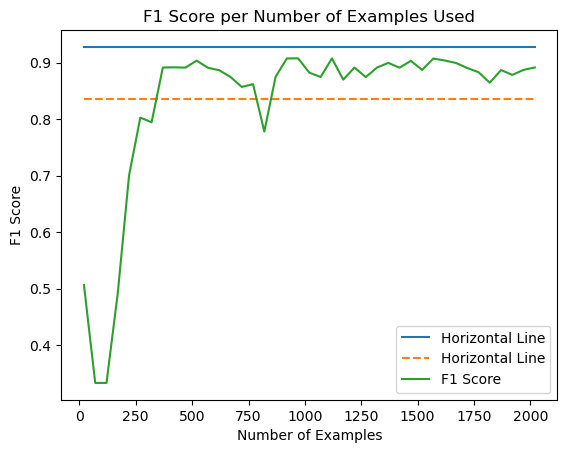

In [81]:

# Define the x-axis values (number of examples)
x = n_per_iter

# Define the y-axis values for the horizontal line
y_horizontal = np.average(f1s_sl['test_50'])

# Define the y-axis values for the f1 score per number of examples used
y_f1_score = np.average(f1s_con['test_50_f1'],axis=1)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the horizontal line
ax.plot(x, np.repeat(y_horizontal, len(x)), label='Horizontal Line')

# Plot 90% of the horizontal line
ax.plot(x, np.repeat(y_horizontal*.9, len(x)), label='Horizontal Line', linestyle='--')

# Plot the f1 score per number of examples used
ax.plot(x, y_f1_score, label='F1 Score')

# Set the x-axis label
ax.set_xlabel('Number of Examples')

# Set the y-axis label
ax.set_ylabel('F1 Score')

# Set the title of the plot
ax.set_title('F1 Score per Number of Examples Used')

# Add a legend
ax.legend()

# Show the plot
plt.show()
